# Communicate Data findings
## by (Abdullah Alweheid)

## Investigation Overview

> In this investigation, we will look at many features related to each trip and its variables we will try to study some feature alone and then try to see the correlations between many of features and give some insights or observations.

## Dataset Overview

> I've chhose Ford GoBike Dataset to apply the knowledge on it. I choosed this dataset for many reasons one of them is letaed to mu country. We don't have some sharing bikes system like this but in fututre and when the Metro government project will be on he land we need some systems and services like this. 

>This dataset describe the data of a public bicycle sharing system called Ford GoBike contains several details about each trip on the bike such as start_station and the duration of the trip.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Master_cleand_GoBike.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization of the duartion range between many trips and users types)

>  In this iilustration we will know the range or mean time of most trips taken from stations to another stations, and which user type uses the service more than the another.

> Observations from below plots:
- The duration range is from 3 to 25 minutes approximately.
- Most users are Subscriber with very high percentage as we will see

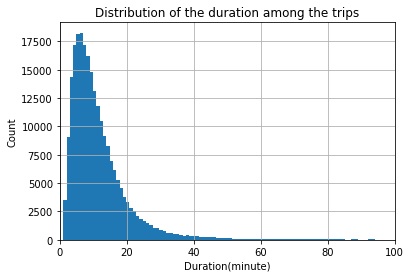

In [63]:
df.hist(column='duration_min',bins=100)
plt.xlim(xmin=-0, xmax = 100);
plt.ylabel('Count'); plt.xlabel('Duration(minute)'); plt.title('Distribution of the duration among the trips');

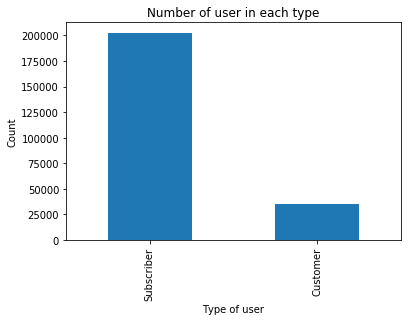

In [62]:
df['user_type'].value_counts().plot(kind='bar');
plt.ylabel('Count'); plt.xlabel('Type of user'); plt.title('Number of user in each type');

## (Visualization of the duartion range between many trips and users types)

> In this slides We will introduce the top 5 stations taht have most trips begun from it then we will see the relation between the day of trip and the duration for each day.

> Observations from below plots:
- There are some stations used very much more than others and these stations was the most approprate choice to begin long trip
- Most of trips that were taking long period were taken in the work days Monday - Thursday

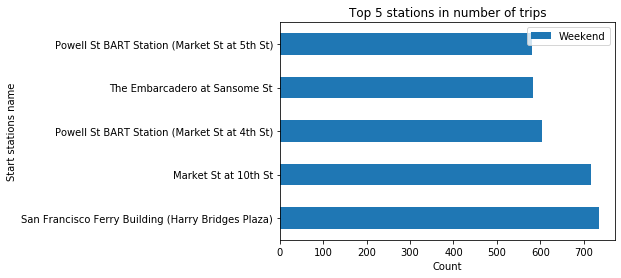

In [59]:
stations_in_weekend = df[['start_station_name','Weekend']].groupby(['start_station_name'], as_index = False).sum().sort_values(by='Weekend',ascending=False).head(5)
stations_in_weekend.plot.barh('start_station_name','Weekend');
plt.ylabel('Start stations name'); plt.xlabel('Count'); plt.title('Top 5 stations in number of trips');

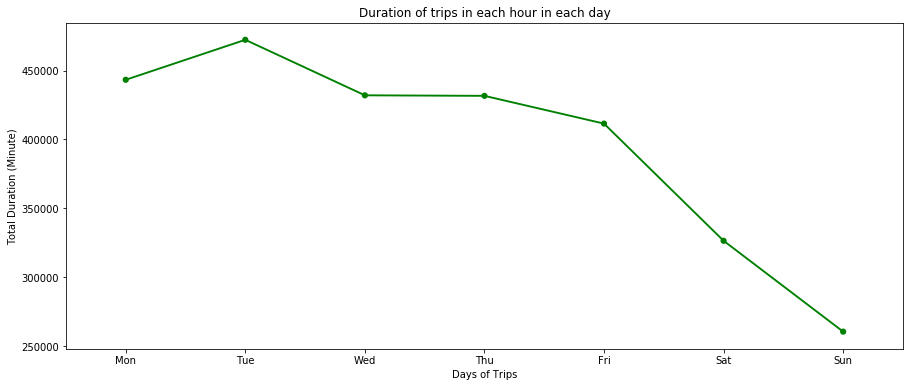

In [61]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Duration_in_days = df[['Day_of_trip','duration_min']].groupby(['Day_of_trip'], as_index = False).sum().sort_values(by='duration_min',ascending=False)
plt.figure(figsize = [15, 6]);
plt.title('Duration of trips in each hour in each day')
sb.pointplot(x='Day_of_trip', y='duration_min', scale=.7, color='green', data=Duration_in_days , order= day_order);
plt.ylabel('Total Duration (Minute)'); plt.xlabel('Days of Trips'); plt.title('Duration of trips in each hour in each day');

## (Visualization of the duartion in (min) through all the days depending on start of the trip )
 > in This multivariant exploration we will take  alook on the duration based on day and at specfic hour at that day.
 
 > Observations from below plots:
- At work days most peak times are from 5 till 10 and from 15 till 22
- At weekend the range will expands to be from 5 till 22 
- in these ranges the duration also will increase.


In [54]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(1, df['Trip_start_hour'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
#     plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
#               [1, 2, 5, 10, 20, 50, 100]);

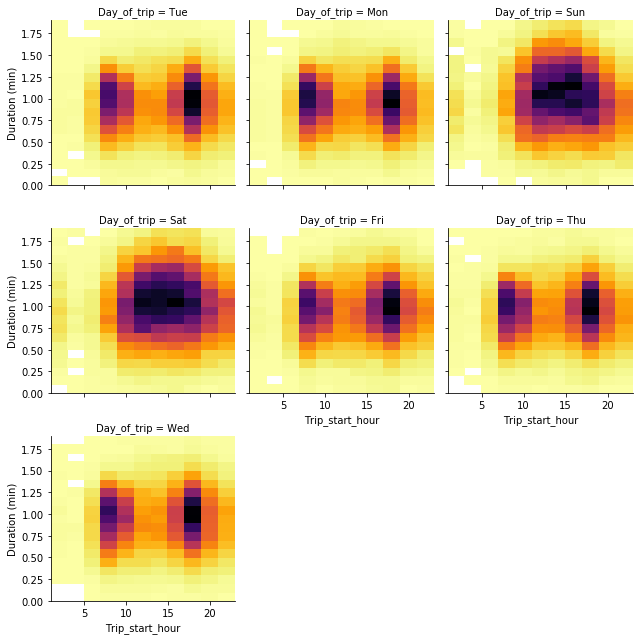

In [58]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df, col = 'Day_of_trip', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'Trip_start_hour', 'log_duration_min', color = 'inferno_r')
g.set_xlabels('Trip_start_hour');
g.set_ylabels('Duration (min)');

!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle
